# ML Course 2 - Practice

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [24]:
df= pd.read_csv('bank_churn.csv')

The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice (3 points)
- Prepare the data set (7 points)

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
#Removing unwanted columns

In [27]:
df = df.drop(['Surname','CustomerId','Gender','NumOfProducts','HasCrCard','CreditScore'],axis = 1)

In [28]:
df.head()

,RowNumber,Geography,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
0,1,France,42,2,0.00,1,101348.88,1
1,2,Spain,41,1,83807.86,1,112542.58,0
2,3,France,42,8,159660.80,0,113931.57,1
3,4,France,39,1,0.00,0,93826.63,0
4,5,Spain,43,2,125510.82,1,79084.10,0


In [29]:
df.duplicated().sum()

0

In [30]:
(df['Age'] <= 0).sum()

0

In [31]:
(df['Balance'] <=0).sum()

3617

In [32]:
df = df.drop(df[df['Balance'] <= 0].index, axis=0)

In [33]:
(df['Age'] <= 0).sum()

0

In [34]:
(df['Balance'] <=0).sum()

0

In [35]:
df.head()

,RowNumber,Geography,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
1,2,Spain,41,1,83807.86,1,112542.58,0
2,3,France,42,8,159660.80,0,113931.57,1
4,5,Spain,43,2,125510.82,1,79084.10,0
5,6,Spain,44,8,113755.78,0,149756.71,1
7,8,Germany,29,4,115046.74,0,119346.88,1


In [36]:
#y = people who exited

In [37]:
y = df.iloc[:, 7]
print(y[:100])

1      0
2      1
4      0
5      1
7      1
      ..
148    0
153    0
158    0
159    0
160    0
Name: Exited, Length: 100, dtype: int64


In [38]:
# X = df.drop('Exited', axis=1)

In [39]:
X = df.iloc[:, 1:]
print(X[:100])

    Geography  Age  Tenure    Balance  IsActiveMember  EstimatedSalary  Exited
1       Spain   41       1   83807.86               1        112542.58       0
2      France   42       8  159660.80               0        113931.57       1
4       Spain   43       2  125510.82               1         79084.10       0
5       Spain   44       8  113755.78               0        149756.71       1
7     Germany   29       4  115046.74               0        119346.88       1
..        ...  ...     ...        ...             ...              ...     ...
148    France   44       9  120681.63               0         74836.34       0
153    France   37       2  127609.59               0         98646.22       0
158    France   73       6   97259.25               1        104719.66       0
159   Germany   33       4  123246.70               0        112687.57       0
160     Spain   22       6  101060.25               1         84699.56       0

[100 rows x 7 columns]


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(X['Geography'])
X['Geography'] = label_encoder.transform(X['Geography'])
print(X[:100])

     Geography  Age  Tenure    Balance  IsActiveMember  EstimatedSalary  \
1            2   41       1   83807.86               1        112542.58   
2            0   42       8  159660.80               0        113931.57   
4            2   43       2  125510.82               1         79084.10   
5            2   44       8  113755.78               0        149756.71   
7            1   29       4  115046.74               0        119346.88   
..         ...  ...     ...        ...             ...              ...   
148          0   44       9  120681.63               0         74836.34   
153          0   37       2  127609.59               0         98646.22   
158          0   73       6   97259.25               1        104719.66   
159          1   33       4  123246.70               0        112687.57   
160          2   22       6  101060.25               1         84699.56   

     Exited  
1         0  
2         1  
4         0  
5         1  
7         1  
..      ...  
1

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Exited'])], remainder='passthrough')
X = oh_encoder.fit_transform(X)
print(X[:6])

[[1.0000000e+00 0.0000000e+00 2.0000000e+00 4.1000000e+01 1.0000000e+00
  8.3807860e+04 1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 4.2000000e+01 8.0000000e+00
  1.5966080e+05 0.0000000e+00 1.1393157e+05]
 [1.0000000e+00 0.0000000e+00 2.0000000e+00 4.3000000e+01 2.0000000e+00
  1.2551082e+05 1.0000000e+00 7.9084100e+04]
 [0.0000000e+00 1.0000000e+00 2.0000000e+00 4.4000000e+01 8.0000000e+00
  1.1375578e+05 0.0000000e+00 1.4975671e+05]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00 2.9000000e+01 4.0000000e+00
  1.1504674e+05 0.0000000e+00 1.1934688e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 4.4000000e+01 4.0000000e+00
  1.4205107e+05 1.0000000e+00 7.4940500e+04]]


In [74]:
df.head()

,RowNumber,Geography,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
1,2,Spain,41,1,83807.86,1,112542.58,0
2,3,France,42,8,159660.80,0,113931.57,1
4,5,Spain,43,2,125510.82,1,79084.10,0
5,6,Spain,44,8,113755.78,0,149756.71,1
7,8,Germany,29,4,115046.74,0,119346.88,1


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4787, 8)
(1596, 8)
(4787,)
(1596,)


In [78]:
X_train[:4,:]

array([[0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 5.1000000e+01,
        5.0000000e+00, 1.4313987e+05, 0.0000000e+00, 4.7795430e+04],
       [1.0000000e+00, 0.0000000e+00, 2.0000000e+00, 2.9000000e+01,
        4.0000000e+00, 1.5101255e+05, 0.0000000e+00, 9.7709700e+03],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 4.2000000e+01,
        0.0000000e+00, 7.7992970e+04, 1.0000000e+00, 9.7906380e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.4000000e+01,
        8.0000000e+00, 1.2227787e+05, 1.0000000e+00, 9.1810710e+04]])

In [79]:
X_test[:4,:6]

array([[0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 5.0000000e+01,
        2.0000000e+00, 1.4382920e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.6000000e+01,
        7.0000000e+00, 1.0368819e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.2000000e+01,
        7.0000000e+00, 1.1441584e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.8000000e+01,
        4.0000000e+00, 1.3652599e+05]])

In [80]:
X_train[:0,4:]
print(Xtrain)

      Geography  Age  Tenure    Balance  IsActiveMember  EstimatedSalary  \
3119          1   51       5  143139.87               0         47795.43   
6716          2   29       4  151012.55               0          9770.97   
1559          1   42       0   77992.97               1         97906.38   
1924          0   44       8  122277.87               1         91810.71   
6510          2   46       8   62400.48               1        132498.39   
...         ...  ...     ...        ...             ...              ...   
1405          0   44       6  128747.69               0        146955.71   
8108          1   35       6  126803.34               1        161133.40   
6239          0   47       6  146034.74               1         77146.14   
376           1   45      10  117231.63               1        122381.02   
8059          0   34       6   90425.15               1         11597.69   

      Exited  
3119       1  
6716       0  
1559       0  
1924       0  
6510       1

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, 6:] = scaler.fit_transform(X_train[:, 6:])
X_test[:, 6:] = scaler.transform(X_test[:, 6:])

In [91]:
X_train[:0,4:]

array([], shape=(0, 4), dtype=float64)

In [95]:
data = X_train

In [97]:
print(X_train)

[[ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.43139870e+05
  -1.02775069e+00 -9.28505177e-01]
 [ 1.00000000e+00  0.00000000e+00  2.00000000e+00 ...  1.51012550e+05
  -1.02775069e+00 -1.58962012e+00]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  7.79929700e+04
   9.72998618e-01 -5.72476258e-02]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.46034740e+05
   9.72998618e-01 -4.18196997e-01]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.17231630e+05
   9.72998618e-01  3.68282421e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.04251500e+04
   9.72998618e-01 -1.55785973e+00]]


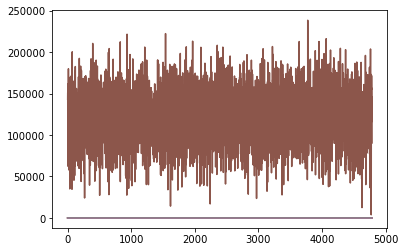

In [115]:
plt.plot(data)
plt.show()

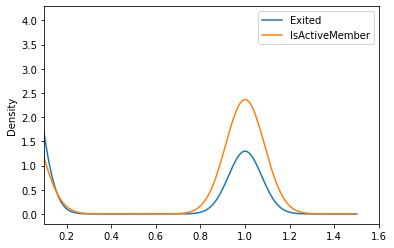

In [109]:
df[['Exited', 'IsActiveMember']].plot(kind='density')
plt.xlim(0.100)
plt.show()

array([[<AxesSubplot:title={'center':'IsActiveMember'}>]], dtype=object)

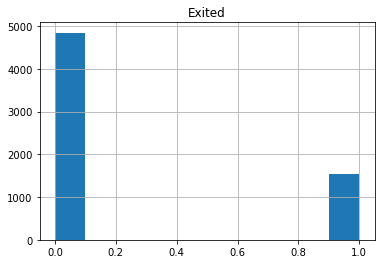

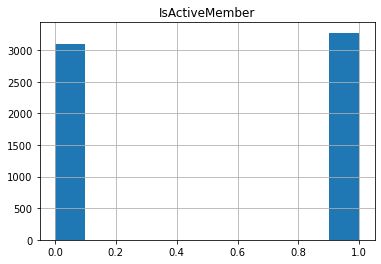

In [113]:
df.hist(['Exited'])
df.hist(['IsActiveMember'])